<a href="https://colab.research.google.com/github/davidguzmanr/Aprendizaje-Profundo/blob/main/Tareas/Tarea-1/Tarea_1_ejercicio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1: perceptrón y redes densas

- **E. David Guzmán Ramírez**
- **Introducción al Aprendizaje Profundo 2021-II**
- **Licenciatura en Ciencia de Datos CU UNAM**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import trange, tqdm

sns.set_style('darkgrid')

## Ejercicio 3

Entrena una red completamente conectada para aproximar la compuerta XOR (puedes usar todas las herramientas de PyTorch). (3 puntos)


**Solución.** Como vimos la compuerta XOR ($\oplus$) es no lineal, de modo que no la podemos aproximar con un solo perceptrón, pero podemos agregar neuronas y/o apilar varias capas.

| $x_1$ | $x_2$ | $y$ |
|-------|-------|-----|
| 0     | 0     | 0   |
| 0     | 1     | 1   |
| 1     | 0     | 1   |
| 1     | 1     | 0   |

In [2]:
class XOR(nn.Module):
    def __init__(self):
        super(XOR, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(2, 4),
            nn.ReLU(),
            nn.Linear(4, 1),
            nn.ReLU(),
        )

    def forward(self, x):
        return self.fc(x)

In [26]:
def train(model, X, y, lr=0.01, epochs=1000):
    # Función de pérdida, error cuadrático medio (mean squared error)
    criterion = nn.MSELoss()
    # Optimizador
    opt = optim.SGD(model.parameters(), lr=lr)

    losses = []
    for epoch in trange(epochs):
        loss_epoch = []
        for x, y_true in zip(X, y):
            y_pred = model(x)  # predecimos
            loss = criterion(y_pred, y_true) # calculamos el error
            loss_epoch.append(loss.item())
            
            opt.zero_grad() # vaciamos los gradientes
            loss.backward() # retropropagamos
            opt.step()      # actualizamos parámetros
        
        losses.append(np.mean(loss_epoch))

    return losses

In [27]:
torch.manual_seed(0)

# Definimos nuestro modelo y probamos con unos datos sintéticos
model = XOR()
x = torch.zeros(1,2)
model(x)

tensor([[0.1357]], grad_fn=<ReluBackward0>)

In [28]:
X_xor = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float32)
y_xor = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# Entrenamos
losses = train(model, X_xor, y_xor, epochs=1000, lr=0.01)

100%|██████████| 1000/1000 [00:01<00:00, 654.41it/s]


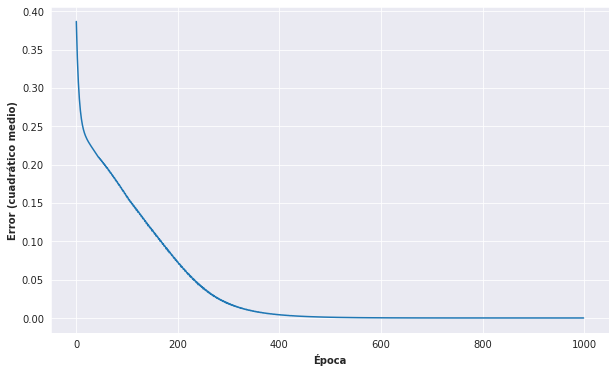

In [29]:
plt.figure(figsize=(10,6))
plt.plot(losses)
plt.xlabel('Época', weight='bold')
plt.ylabel('Error (cuadrático medio)', weight='bold')

plt.show()

In [30]:
def step(z):
    """Computes step function."""
    return 1.0 if z > 0.5 else 0.0

step_vectorize = np.vectorize(step)

In [31]:
# predicción por cada ejemplo
print('---------------------')
print('x_1 \tx_2 \ty_hat')
print('---------------------')
for x in X_xor:
    x1, x2 = x 
    y_hat = step(model(x))
    print(f'{x1}\t{x2}\t{y_hat}')

---------------------
x_1 	x_2 	y_hat
---------------------
0.0	0.0	0.0
0.0	1.0	1.0
1.0	0.0	1.0
1.0	1.0	0.0


Ahora veamos cómo está clasificando 

<!-- ([Tensorflow playground](https://playground.tensorflow.org/)). -->

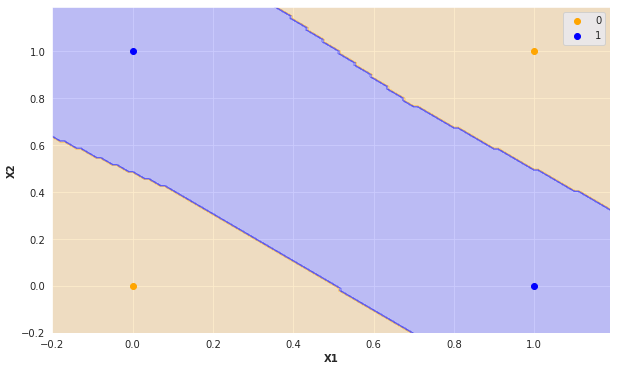

In [32]:
X1, X2 = np.meshgrid(np.arange(start=-0.2, stop=1.2, step=0.01), np.arange(start=-0.2, stop=1.2, step=0.01))
Z = model(torch.tensor(np.array([X1.ravel(), X2.ravel()]).T, dtype=torch.float32)).reshape(X1.shape)
Z = step_vectorize(Z.detach().numpy())

plt.figure(figsize=(10,6))
plt.contourf(X1, X2, Z, alpha=0.2, cmap=ListedColormap(('orange', 'blue')))
plt.scatter([0,1], [0,1], color='orange', label='0')
plt.scatter([0,1], [1,0], color='blue', label='1')

plt.xlabel('X1', weight='bold')
plt.ylabel('X2', weight='bold')
plt.legend()
plt.show()